In [13]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visualization
sns.set(style="whitegrid")


In [14]:
# Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Adjust path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\nhlan\AppData\Local\Temp\ipykernel_12644\3140912322.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nhlan\AppData\Local\Temp\ipykernel_12644\3140912322.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [16]:
# Summary statistics
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


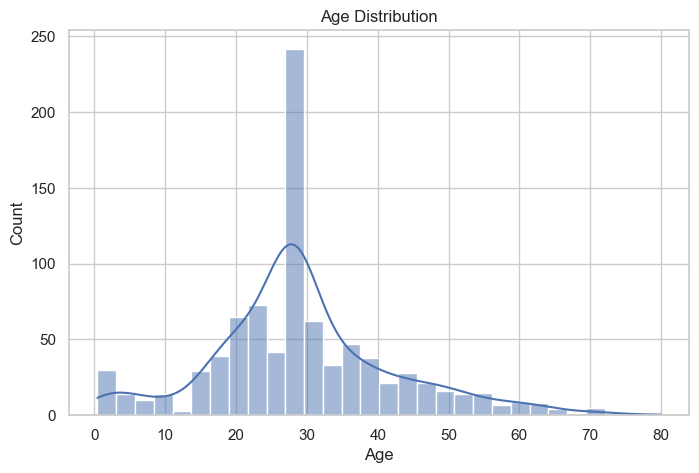

In [17]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


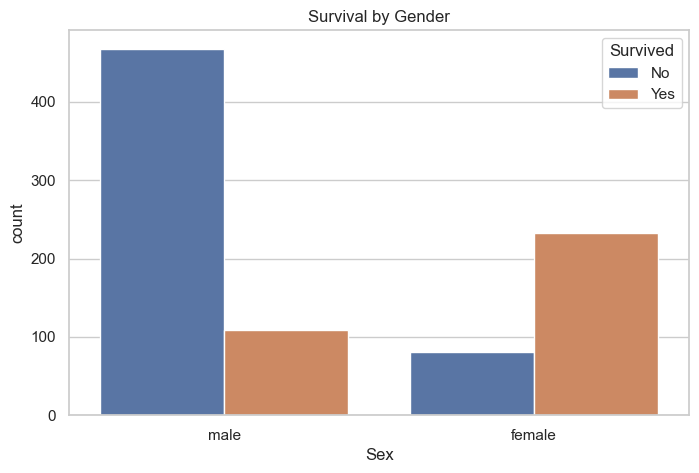

In [18]:
# Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.legend(title="Survived", loc="upper right", labels=["No", "Yes"])
plt.show()


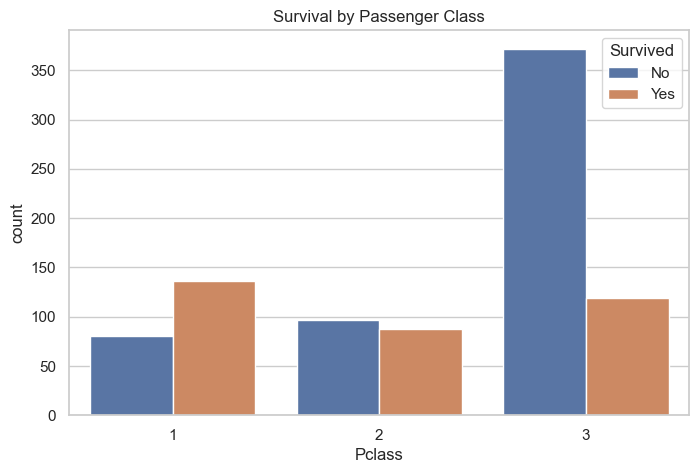

In [19]:
# Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", loc="upper right", labels=["No", "Yes"])
plt.show()


In [20]:
# Convert 'Sex' column to numerical
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' column to numerical values
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})


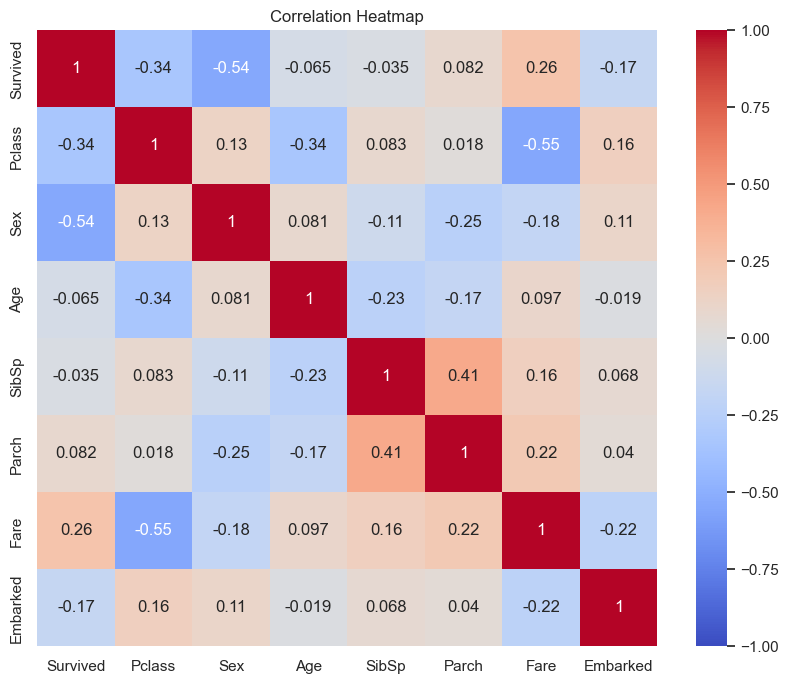

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()